In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1024)
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten ,GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

from pathlib import Path


## tensorflow & Keras
import tensorflow as tf  

In [4]:
train_labels = pd.read_csv('train.csv')
train_images = Path('train')

test_labels = pd.read_csv('test.csv')
test_images = Path('tets')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()


0    train\00000.png
1    train\00001.png
2    train\00002.png
3    train\00003.png
4    train\00004.png
Name: Filepath, dtype: object

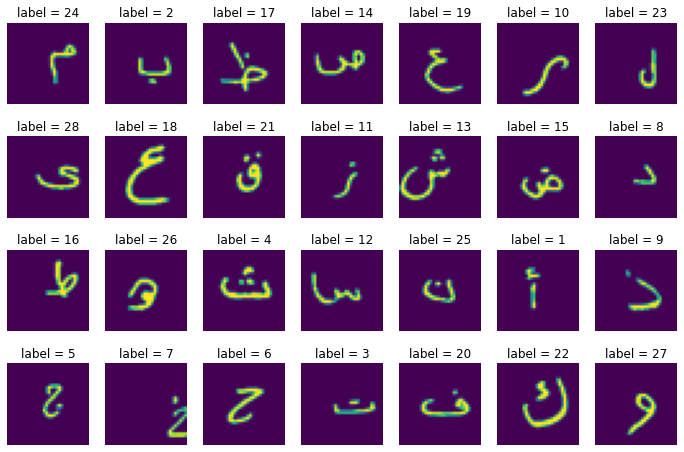

In [5]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [6]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))

print()

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is =>', img.shape)

Number of Instances in train_set => 13440
Number of Instances in train_labels => 13440

shape of each Image is => (32, 32, 4)


In [7]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (13440, 32, 32, 3)
train_full_labels.shape => (13440,)


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=train_full_labels, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (10752, 32, 32, 3)
X_valid.shape => (2688, 32, 32, 3)
y_train.shape => (10752,)
y_valid.shape => (2688,)


In [10]:
# Designing Model Architecture

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense , Flatten

# def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
# create model

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, padding='same',input_shape=(32,32,3), kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())


#Fully connected final layer
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001 , beta_1=0.99, beta_2=0.9999)
# Compile model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer= opt)
# return model

history=model.fit(X_train, y_train, 
                validation_data=(X_valid, y_valid),
                epochs=250, batch_size=32, verbose=1)

# lr = 0.0001 , b1 = 0.99 , b2 = 0.9999 , epochs = 250 , batch_size = 64

Epoch 1/250
336/336 [==============================] - 81s 222ms/step - loss: 2.8430 - accuracy: 0.1963 - val_loss: 3.6988 - val_accuracy: 0.1023
Epoch 2/250
336/336 [==============================] - 78s 232ms/step - loss: 1.8800 - accuracy: 0.4154 - val_loss: 1.5985 - val_accuracy: 0.5153
Epoch 3/250
336/336 [==============================] - 70s 208ms/step - loss: 1.3533 - accuracy: 0.5623 - val_loss: 1.0290 - val_accuracy: 0.6842
Epoch 4/250
336/336 [==============================] - 69s 205ms/step - loss: 1.0265 - accuracy: 0.6723 - val_loss: 0.8036 - val_accuracy: 0.7310
Epoch 5/250
336/336 [==============================] - 70s 207ms/step - loss: 0.8308 - accuracy: 0.7332 - val_loss: 0.6082 - val_accuracy: 0.8110
Epoch 6/250
336/336 [==============================] - 72s 213ms/step - loss: 0.7042 - accuracy: 0.7714 - val_loss: 0.5240 - val_accuracy: 0.8322
Epoch 7/250
336/336 [==============================] - 72s 215ms/step - loss: 0.6015 - accuracy: 0.8117 - val_loss: 0.4890 -

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

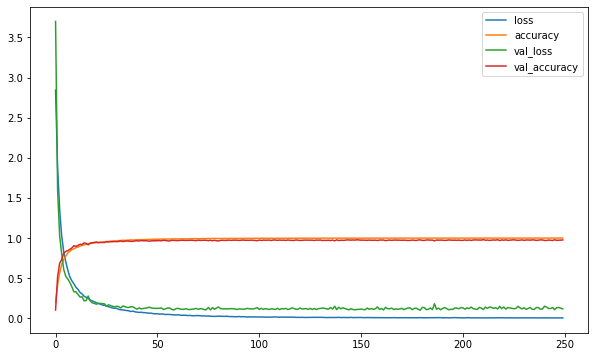

In [13]:
pd.DataFrame(history.history).plot(figsize=(10, 6));

In [14]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.02341443859040737
acc_all_data => 0.9951636791229248
